# Spectrum Generation

We use the data to generate spectra for the incidence of particles on the detector

In [4]:
#Include modules
from accelerate import *
from tqdm.notebook import tqdm

%matplotlib widget

In [8]:
# Read the files

# Parameters
run                     = 'C1_Window'

# Find the files
foldername  = f'../build/output'
filenames   = [os.path.join(foldername,filename) for filename in os.listdir(foldername)]

# Print the number of files found
print(f'Found {len(filenames)} data files in {foldername}')

Found 8 data files in ../build/output


In [9]:
#List of possible materials
FerroanNoriticAnorthosite = {
    'name' : 'Ferroan Noritic Anorthosite',
    'peaks' : {
        'Fe\nKa' : 6.40,
        'Ti\nKa' : 4.51,
        'Si\nKa' : 1.74,
        'Al\nKa' : 1.49,
        'Mg\nKa' : 1.25,
        'O\nKa'  : 0.52,
        'Mn\nKa' : 5.90,
        'Ca\nKa' : 3.69,
        'Na\nKa' : 1.04,
        'K\nKa'  : 3.31,
        'Cr\nKa' : 5.41,
        'Sr\nKa' : 14.16,
    }
}

Basalt = {
    'name' : 'Basalt',
    'peaks' : {
        'Fe\nKa' : 6.40,
        'Fe\nKb' : 7.06,
        'Ti\nKa' : 4.51,
        'Ti\nKb' : 4.93,
        'Si\nKa' : 1.74,
        'Al\nKa' : 1.49,
        'Mg\nKa' : 1.25,
        'O\nKa'  : 0.52,
    }
}

PigeoniteBasalt = {
    'name' : 'Pigeonite Basalt',
    'peaks' : {                
        'O\nKa'  : 0.52,
        'Si\nKa' : 1.74,
        'Ti\nKa' : 4.51,
        'Al\nKa' : 1.49,
        'Fe\nKa' : 6.40,
        'Mn\nKa' : 5.90,
        'Mg\nKa' : 1.25,
        'Ca\nKa' : 3.69,
        'Na\nKa' : 1.04,
        'K\nKa'  : 3.31,
        'P\nKa'  : 2.01,
        'S\nKa'  : 2.30,
        'V\nKa'  : 4.95,
        'Cr\nKa' : 5.41,
        'Sr\nKa' : 14.16,
        'Zr\nKa' : 15.78,

    }
}

ImpactMeltBreccia = {
    'name' : 'Impact Melt Breccia',
    'peaks' : {                
        'O\nKa'  : 0.52,
        'Si\nKa' : 1.74,
        'Ti\nKa' : 4.51,
        'Al\nKa' : 1.49,
        'Fe\nKa' : 6.40,
        'Mn\nKa' : 5.90,
        'Mg\nKa' : 1.25,
        'Ca\nKa' : 3.69,
        'Na\nKa' : 1.04,
        'K\nKa'  : 3.31,
        'P\nKa'  : 2.01,
        'Cr\nKa' : 5.41,
        'Sr\nKa' : 14.16,
        'Ni\nKa' : 7.48,
        'Ba\nKa' : 32.19,


    }
}

XrayTube:   0%|          | 0/1 [00:00<?, ?it/s]

loadFile:   0%|          | 0/8 [00:00<?, ?it/s]

[      EventID  TrackID  MigrantID Particle  InitialEnergy  DepositedEnergy  \
0        1897        1         -1       e-       923.3910     1.605920e-23   
1        1898        1         -1       e-       885.3270     1.465940e-23   
2        1901        1         -1       e-       370.3790     1.840650e-23   
3        1911        1         -1       e-       425.4160     1.623140e-23   
4        1918        1         -1       e-       901.7800     1.538190e-23   
...       ...      ...        ...      ...            ...              ...   
3077    99203        1         -1       e-       850.0510     1.897060e-23   
3078    99206        1         -1       e-       982.2200     1.425880e-23   
3079    99210        1         -1       e-        19.4207     1.373740e-22   
3080    99219        1         -1       e-       299.5460     2.135350e-23   
3081    99222        1         -1       e-       693.9100     1.843580e-23   

      XPosition  YPosition  ZPosition     LocalTime           

getEnergy:   0%|          | 0/8 [00:00<?, ?it/s]

smearEnergy:   0%|          | 0/8 [00:00<?, ?it/s]

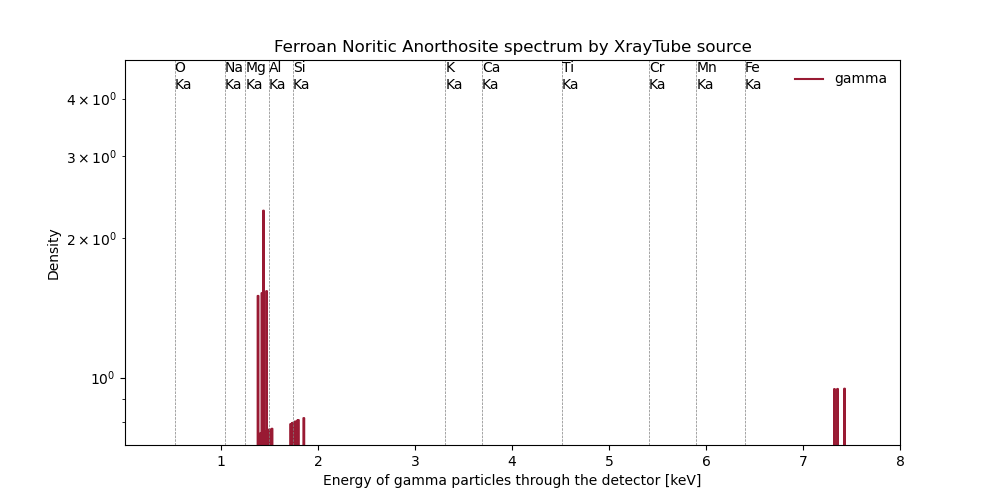

In [10]:
RUN_STRUCTURE = {
    'run0' : 'XrayTube'
}

MATERIAL = FerroanNoriticAnorthosite

STD                 = 0.04
particleEnergyList  = {}
PARTICLES           = ['gamma']
EFFICIENCY          = pd.read_csv('./data/SDD_Efficiency/C1.csv', names=['Energy','Efficiency'])

# For all the simulation runs
pbar = tqdm(RUN_STRUCTURE,desc=list(RUN_STRUCTURE.values())[0])
for i,run in enumerate(pbar):
    # Collect their output files
    files = loadFiles([filename for filename in filenames if run in filename])
    print(files)
    

    # Extract the energy for each particle
    particleEnergyList[run] = getParticleEnergiesSmeared(files,
        smearfunc   = smear_gaussian,
        size        = STD,
        groupBy     = 'TrackID',
        columnName  = 'InitialEnergy'
        )
    
    particles = None
    try:
        particles = pd.concat([particleEnergyList[run][p] for p in PARTICLES])
    except:
        pass
    
    # Plot the spectrum
    if particles is not None : plotParticleHistogram(particles,
        source          = RUN_STRUCTURE[run],
        PARTICLE        = ' and '.join(PARTICLES),
        MATERIAL        = MATERIAL,
        SHOW_MATERIAL   = True,
        LIMS            = (0,8),
        MAX_PEAKS       = 0,
        NBINS           = 1000,
        SAVE            = True,
        yscale          = 'log',
        efficiency      = EFFICIENCY)

    # Change the description of the progress bar to show the material processed
    try:
        pbar.set_description(list(RUN_STRUCTURE.values())[i+1])
    except:
        pass

In [5]:
print("The unique particles are:")
for run in particleEnergyList:
    print(f'{run}:',[[particle, len(particleEnergyList[run][particle])] for particle in particleEnergyList[run]])

The unique particles are:
run0: [['gamma', 35648], ['e-', 128], ['neutron', 15]]
run1: [['gamma', 6846], ['e-', 113]]
run2: [['gamma', 542919], ['e-', 107264]]
run3: [['e-', 1002627], ['gamma', 19310]]
run4: [['gamma', 33727], ['e-', 138]]
